# Projeto 2

## Precessão do periélio de Mercúrio

As leis de Kepler foram desenvolvidas com base em medidas (extremamente acuradas) realizadas a olho nu. Quando equipamentos mais precisos para medição de posição e tempo foram desenvolvidos, ficou claro que a trajetória de Mercúrio não era como esperado uma elipse, mas sim uma elipse com um deslocamento contínuo em seu periélio.

O deslocamento pode ser medido como de 566 *arco-segundos por século*. Posteriormente se descobriu que uma boa parte desse deslocamento é devida à influência dos outros planetas do sistema solar (além do Sol). Os cálculos prevêm o deslocamento de 523 arco-segundos por século. Resta então explicar aproximadamente 43 arco-segundos por século do deslocamento.

---

A explicação somente surgiu com o desenvolvimento da teoria da relatividade geral, que altera a lei da gravitação. Considerando o fator mais significativo, a força de gravitação sobre Mercúrio fica adaptada para incluir fator relativístico da seguinte forma (escrita para a interação entre o Sol e Mercúrio):

$$ F_G = \frac{GM_SM_M}{r^2}\left(1 + \frac{\alpha}{r^2}\right),$$

onde $\alpha\approx1.1\cdot10^{-8}\,\mathrm{UA}^2$ (para Mercúrio), $GM_S=4\pi^2\,\mathrm{UA}^3/\mathrm{ano}^2$ e a força é na direção radial para dentro (em direção ao Sol). Projetando a força nas direções cartesianas considerando o Sol na origem e Mercúrio no ponto $(x, y)$:

\begin{eqnarray}
\frac{d^2x}{dt^2} & = & -\frac{GM_S}{r^3}\left(1 + \frac{\alpha}{r^2}\right)x\\
\frac{d^2y}{dt^2} & = & -\frac{GM_S}{r^3}\left(1 + \frac{\alpha}{r^2}\right)y\\
\end{eqnarray}

onde $r = \sqrt{x^2+y^2}.$

Para completar, usamos as seguintes condições iniciais com Mercúrio inicialmente no seu ponto mais afastado do Sol (veja seção 4.3 do livro *Computational Physics* de Giordano e Nakanishi para explicação das expressões):

\begin{eqnarray}
x(0) & = & (1+e)a\\
y(0) & = & 0\\
v_x(0) & = & 0\\
v_y(0) & = & \sqrt{\frac{GM_S(1-e)}{a(1+e)}},
\end{eqnarray}

onde para Mercúrio $a \approx 0.39\,\mathrm{UA}$ (eixo maior da elipse) e $e\approx0.206$ (excentricidade).

---

O projeto consiste em avaliar **a contribuição do fator relativístico** para a precessão do periélio de Mercúrio.

Você deve proceder da seguinte forma:
1. Implemente código para integrar a trajetória de Mercúrio usando as equações e condições iniciais acima. Use distâncias em $\mathrm{UA}$ e tempos em anos.
1. Simule por aproximadamente 10 períodos de revolução para $\alpha=0$ e plote um gráfico da trajetória. Este é o *caso não-relativístico,* e a trajetória deve ser uma elipse perfeita com o Sol em um dos focos. Escolha um tamanho de passo de tempo suficientemente preciso (a curva traçada deve ser suave). Lembre-se de que o período de rotação de Mercúrio é de aproximadamente 88 dias.
1. Repita a simulação, mas agora com $\alpha=0.01$. Este é um caso com fator relativístico *grande*, o que significa que a precessão deve ser claramente visível na trajetória.
1. O valor real de $\alpha=1.1\cdot10^{-8}$ para Mercúrio é **extremamente baixo**, o que significa que seria necessário simular o sistema por um grande intervalo de tempo para permitir avaliar a taxa de precessão. Ao invés disso, vamos seguir um outro método: Vamos avaliar a taxa de precessão para diversos valores de $\alpha$. Veremos que ela varia *linearmente* com $\alpha$. Avaliaremos então o coeficiente dessa dependência linear e calcularemos a taxa de precessão usando o $\alpha$ conhecido de Mercúrio, conforme descrito nos passos abaixo.
  1. Primeiro vamos fazer um experimento realizando a simulação do sistema com $\alpha=0.001$ por pelo menos 20 períodos de rotação.
  1. Precisamos definir um método para marcar um ponto específico da elipse, para podermos avaliar como ele está se deslocando com o tempo devido à precessão. Para isso, usaremos o ponto mais afastado do Sol. Esse ponto pode ser determinado pelo seguinte raciocínio: O ponto mais afastado é aquele para o qual antes de chegar nele as distâncias vão aumentando, e depois que ele passa as distâncias vão diminuindo. Dizendo de outra forma, ele é um ponto onde a derivada da distância até o Sol é zero, e *a derivada é positiva antes dele e negativa depois dele.* Ao invés de usar a distância, usaremos a distância ao quadrado (pois o ponto de máximo é o mesmo). $$\frac{d}{dt}r^2 = \frac{d}{dt}(x^2 + y^2) = 2\left(x\frac{dx}{dt} + y\frac{dy}{dt}\right).$$ O fator 2 pode ser ignorado para nossos propósitos (não afeta o sinal da derivada). Queremos então os valores de $t$ para os quais a expressão $$x v_x + y v_y$$ *passa de positiva para negativa.* Os valores de $x, y, v_x$ e $v_y$ são calculados durante a integração das equações diferenciais no passo anterior. Usando os valores retornados pela rotina de integração, calcule os valores da expressão acima e encontre as coordenadas $(x,y)$ onde ele passa de positivo (ou zero) para negativo (ou zero); para nossos propósitos, *basta guardar um desses pontos* (o imediatamente anterior ou o imediatamente posterior ao máximo) como o ponto de transição; isso deve ser feito para cada uma das transições de máximo existentes na trajetória calculada. Para esses pontos precisamos agora encontrar os valores dos ângulos entre o eixo $x$ (positivo) e o raio da posição de Mercúrio (dica: Esse ângulo pode ser calculado usando `numpy.arctan2`, veja documentação). O valor desse ângulo é o que nos interessa para determinar como a elipse está precessionando com o tempo. Guarde o valor do ângulo $\theta$ de máxima distância e o instante de tempo associado ($t$ quando o máximo foi atingido).
  1. Plote um gráfico com os ângulos de máximo contra o tempo e verifique que eles formam uma reta (aproximadamente) que passa pela origem.
  1. Use a função `curve_fit` do módulo `scipy.optimize` para fazer um ajuste da função $\theta = \rho t$ a esses pontos, encontrando o melhor valor de $\rho$ de acordo com os dados (a função `curve_fit` irá retornar, entre outros, o valor desejado de $\rho$, que é a taxa de precessão para o $\alpha$ usado na simulação).
  1. Agora, repita os passos A a D acima para 20 valores de $\alpha$ igualmente espaçados entre 0 e 0.002, excluindo o zero, encontrando e guardando os valores de $\rho$ para cada um dos $\alpha$.
  1. Plote o gráfico de $\rho$ versus $\alpha$ e verifique que ele é uma linha reta que passa pela origem.
  1. Use novamente `curve_fit`, mas agora para ajustar $\rho = c \alpha$ e econtrar o melhor valor de $c$.
  1. Usando o valor de $c$ encontrado acima e o valor de $\alpha$ conhecido para Mercúrio (ítem 4), calcule a taxa de precessão de Mercúrio devida a efeitos relativísticos e confira com o valor esperado de 43 arco-segundos por século.

# Execução do projeto

1. Adapto o código do projeto anterior, para integrar um dado número de órbitas, contando o fim da órbita sempre no afélio. Como as condições iniciais serão sempre as mesmas (começa no afélio), não é necessário tomá-las como parâmetro.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import ode
from scipy.optimize import curve_fit
%matplotlib inline

# Função de derivadas que define as equações de movimento de Mercúrio.
# Tempo medido em anos e distância medida em unidades astronômicas.
def derivadas(t, estado, α, GMs=4*np.pi**2):
    x,y,vx,vy = estado
    r2 = x*x+y*y
    r3 = pow(r2,3/2)
    f = GMs/r3*(1+α/r2)
    return [vx, vy, -f*x, -f*y]

# Condições iniciais (afélio em x>0, y=0)
a,e, GMs = .39, .206, 4*np.pi**2
inicial = [a*(1+e), 0, 0, np.sqrt(GMs*(1-e)/(a*(1+e)))]

# Integra as equações de movimento de Mercúrio com correção relativística, a partir
# de t0 a passos Δt, por um número de órbitas Norbitas, sempre terminando no afélio.
# Retorna tupla de arrays da trajetória (x,y,vx,vy).
def integra_planeta(Norbitas=1, a=.39, e=.206, α=1.1e-8, t0=0, Δt=0.001, inicial=inicial):
    r = ode(derivadas)
    r.set_initial_value(inicial,t0)
    r.set_f_params(α)
    
    t2 = [t0] # Cria uma lista para guardar os instantes de tempo
    estado_t2 = [inicial] # Cria uma lista para guardar estados
    afelio_t2 = [True]   # Cria uma máscara para os índices onde chega no afélio
    
    # Parâmetro λ = x*vx + y*vy decide se a órbita está num extremo
    λ = inicial[0]*inicial[2]+inicial[1]*inicial[3]
    voltas = 0
    
    while r.successful() and voltas<Norbitas: # r.successful() verifica que a integração deu certo
        new_t = r.t + Δt # Calcula o proximo instante (r.t é o último calculado)
        t2.append(new_t) # Adiciona novo instante de tempo na lista
        new_estado = r.integrate(new_t) # Calcula novo estado
        new_λ = new_estado[0]*new_estado[2]+new_estado[1]*new_estado[3]
        estado_t2.append(new_estado) # Adiciona na lista de estados
        afelio = new_λ < 0 and λ > 0
        if afelio:
            voltas += 1
        afelio_t2.append(afelio)
        λ = new_λ
    
    # Retornar arrays x,y,z,u,v,w em função do tempo
    estado_t2 = np.array(estado_t2)
    return tuple([estado_t2[:,i] for i in range(4)] +
                 [np.array(t2), np.array(afelio_t2)])

2. Agora crio uma função que plota a trajetória de Mercúrio ao redor do Sol, e possivelmente também a derivada temporal de $r^2$. No bloco seguinte, executo a simulação de 10 órbitas com $\alpha$=0.

In [2]:
def integra_e_mostra(mostrar_derivada=False, Norbitas=1, α=1.1e-8, **args):
    x,y,vx,vy,t,afelio = integra_planeta(Norbitas=Norbitas, α=α, **args)
    
    if mostrar_derivada:
        λ = x*vx+y*vy

        fig = plt.figure(figsize=(10,5))

        ax1 = fig.add_subplot(121)
        ax1.plot(t,2*λ)
        ax1.plot(t[afelio],λ[afelio],'or')
        ax1.set_ylabel('Derivada de $r^2$')
        ax1.set_xlabel('Tempo (anos)')

        ax2 = fig.add_subplot(122)
    else:
        fig = plt.figure(figsize=(5,5))
        ax2 = fig.add_subplot(111)
    
    ax2.set_aspect('equal')
    ax2.plot(x,y)
    ax2.plot(x[afelio],y[afelio],'or')
    ax2.plot([0],[0],'oy')
    ax2.set_xlabel('x (U.A.)')
    ax2.set_ylabel('y (U.A.)')

    fig.suptitle('{} órbitas, $\\alpha={}$, afélios em vermelho'.format(Norbitas,α), fontsize=15)
    fig.show()

/home/solano/.local/lib/python3.7/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


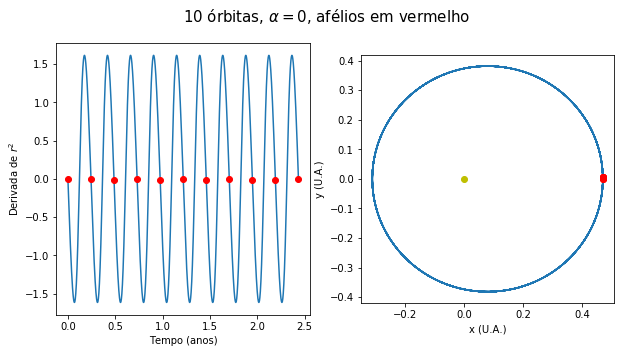

In [3]:
integra_e_mostra(mostrar_derivada=True,Norbitas=10,α=0)

3. Agora simulamos com $\alpha$ = 0.01:

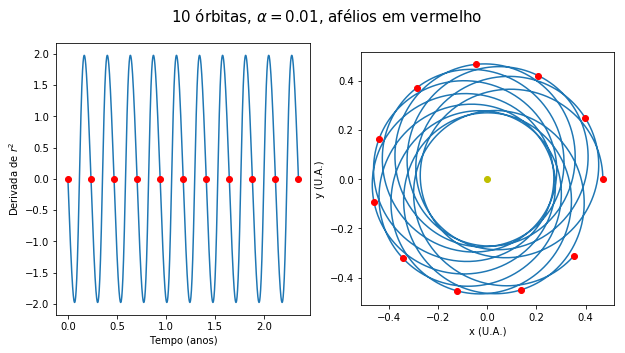

In [4]:
integra_e_mostra(mostrar_derivada=True, Norbitas=10, α=0.01)

4. (A) Com o parâmetro $\alpha$ dez vezes menor, os afélios avançam bem mais lentamente:

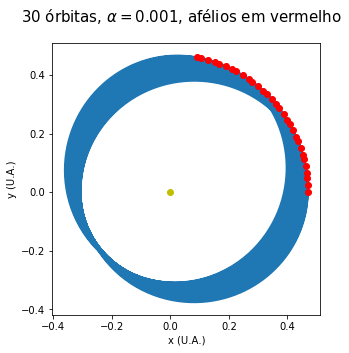

In [5]:
integra_e_mostra(Norbitas=30, α=0.001)

(B), (C) e (D): com a máscara `afelio` retornada pela função `integra_planeta` podemos selecionar estes pontos e calcular o ângulo:

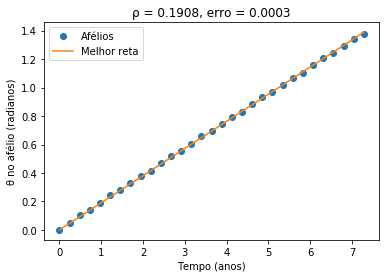

In [6]:
x, y, vx, vy, t, afelio = integra_planeta(Norbitas=30, α=0.001)

t_af, x_af, y_af = t[afelio], x[afelio], y[afelio]
θ = np.arctan2(y_af, x_af)

(ρ,), ((ρ_var,),) = curve_fit((lambda t,ρ: ρ*t), t_af, θ, 1)
ρ_err = np.sqrt(ρ_var)  # raiz quadrada da variância

plt.plot(t_af, θ, 'o', label='Afélios')
plt.plot(t_af, ρ*t_af, label='Melhor reta')
plt.legend()
plt.ylabel('θ no afélio (radianos)')
plt.xlabel('Tempo (anos)')
plt.title('ρ = %.4f, erro = %.4f'%(ρ,ρ_err))
plt.show()

(E) Repetindo um pouco do código acima na função `calcula_ρ`, obtemos os arrays `ρ` e `ρ_err` com os valores de ρ e seus erros, para $\alpha$ variando de 0 até 0.002 em 20 valores, excluindo o 0.

In [7]:
@np.vectorize
def calcula_ρ(Norbitas, α):
    x, y, vx, vy, t, afelio = integra_planeta(Norbitas=Norbitas, α=α)
    t_af, x_af, y_af = t[afelio], x[afelio], y[afelio]
    θ = np.arctan2(y_af, x_af)
    
    (ρ,), ((ρ_var,),) = curve_fit((lambda t, ρ: ρ*t), t_af, θ, 1)
    ρ_err = np.sqrt(ρ_var)
    
    return ρ, ρ_err

α = np.linspace(0, 0.002, 21)[1:]
Norbitas = 30
ρ, ρ_err = calcula_ρ(Norbitas, α)

(F) O gráfico é uma reta:

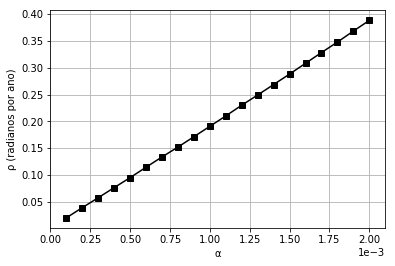

In [8]:
plt.errorbar(α, ρ, ρ_err, fmt='ks-')
plt.xlabel('α')
plt.ylabel('ρ (radianos por ano)')
plt.ticklabel_format(axis='x',scilimits=(-4,-4))
plt.xlim(0,2.1e-3)
plt.grid()
plt.show()

(G) Calculando $c$ tal que $\rho = c \alpha$, levando em conta os erros em $\rho$:

In [13]:
(c,), ((c_var,),) = curve_fit((lambda α, c: c*α), α, ρ, 100, ρ_err)
c_err = np.sqrt(c_var)

print('O valor é c = %.1f +- %.1f'%(c,c_err))

O valor é c = 192.6 +- 0.3


(H) Com $\alpha = 1.1 \times 10^{-8}$ (valor real para Mercúrio), obtemos uma taxa de precessão $\rho = c \alpha$ de

In [14]:
ρfinal, ρfinal_err = np.rad2deg(1.1e-8 * np.array([c,c_err]))*60*60*100
print('%.2f +- %.2f arcossegundos por século'%(ρfinal, ρfinal_err))

43.69 +- 0.06 arcossegundos por século


Como isto ainda não leva em conta a incerteza em $\alpha$, que tem 2 algarismos significativos, chegamos ao **resultado final de 44 arcossegundos por século**.

## Bônus artístico

Algumas órbitas fechadas bonitas e/ou surpreendentes:

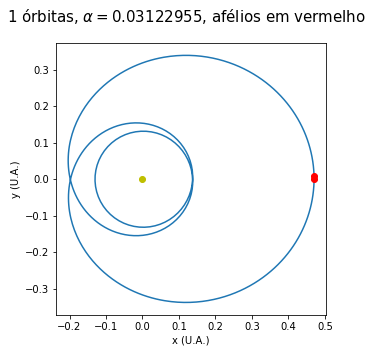

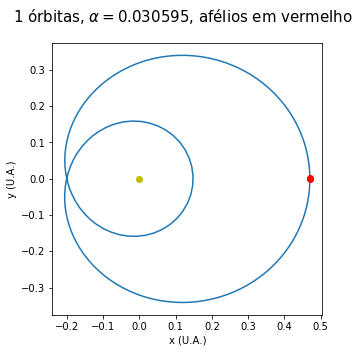

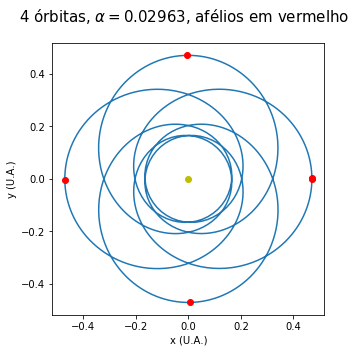

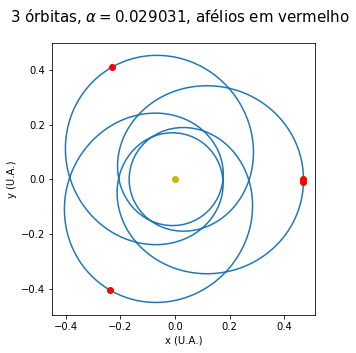

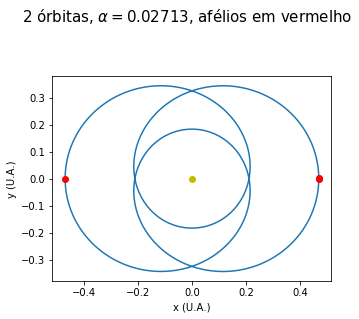

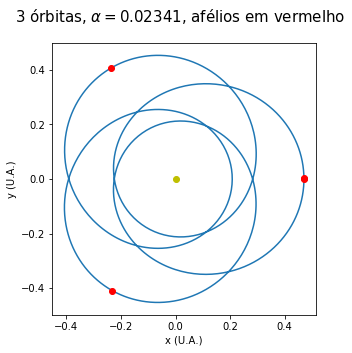

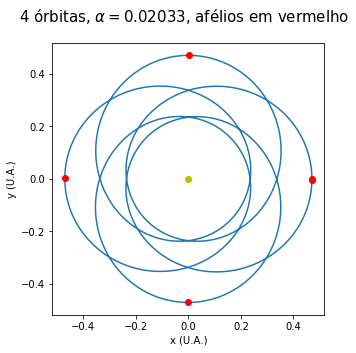

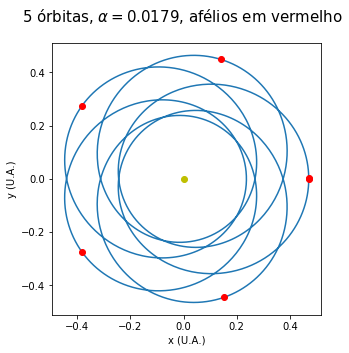

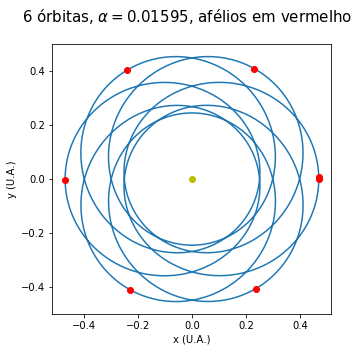

In [159]:
integra_e_mostra(Norbitas=1, α=0.03122955, Δt=5e-4)  # periélio e afélio de lados opostos, mas dando voltas antes
integra_e_mostra(Norbitas=1, α=0.030595)             # periélio e afélio do mesmo lado da órbita!
integra_e_mostra(Norbitas=4, α=0.02963)
integra_e_mostra(Norbitas=3, α=0.029031)
integra_e_mostra(Norbitas=2, α=0.02713)              # periélio e afélio fazendo 90 graus!
integra_e_mostra(Norbitas=3, α=0.02341)
integra_e_mostra(Norbitas=4, α=0.02033)
integra_e_mostra(Norbitas=5, α=0.01790)
integra_e_mostra(Norbitas=6, α=0.01595)